In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
# Changing the mode to notebook
%matplotlib notebook

# Setting the style to reflect the ggplot style
mpl.style.use('ggplot')

<IPython.core.display.Javascript object>


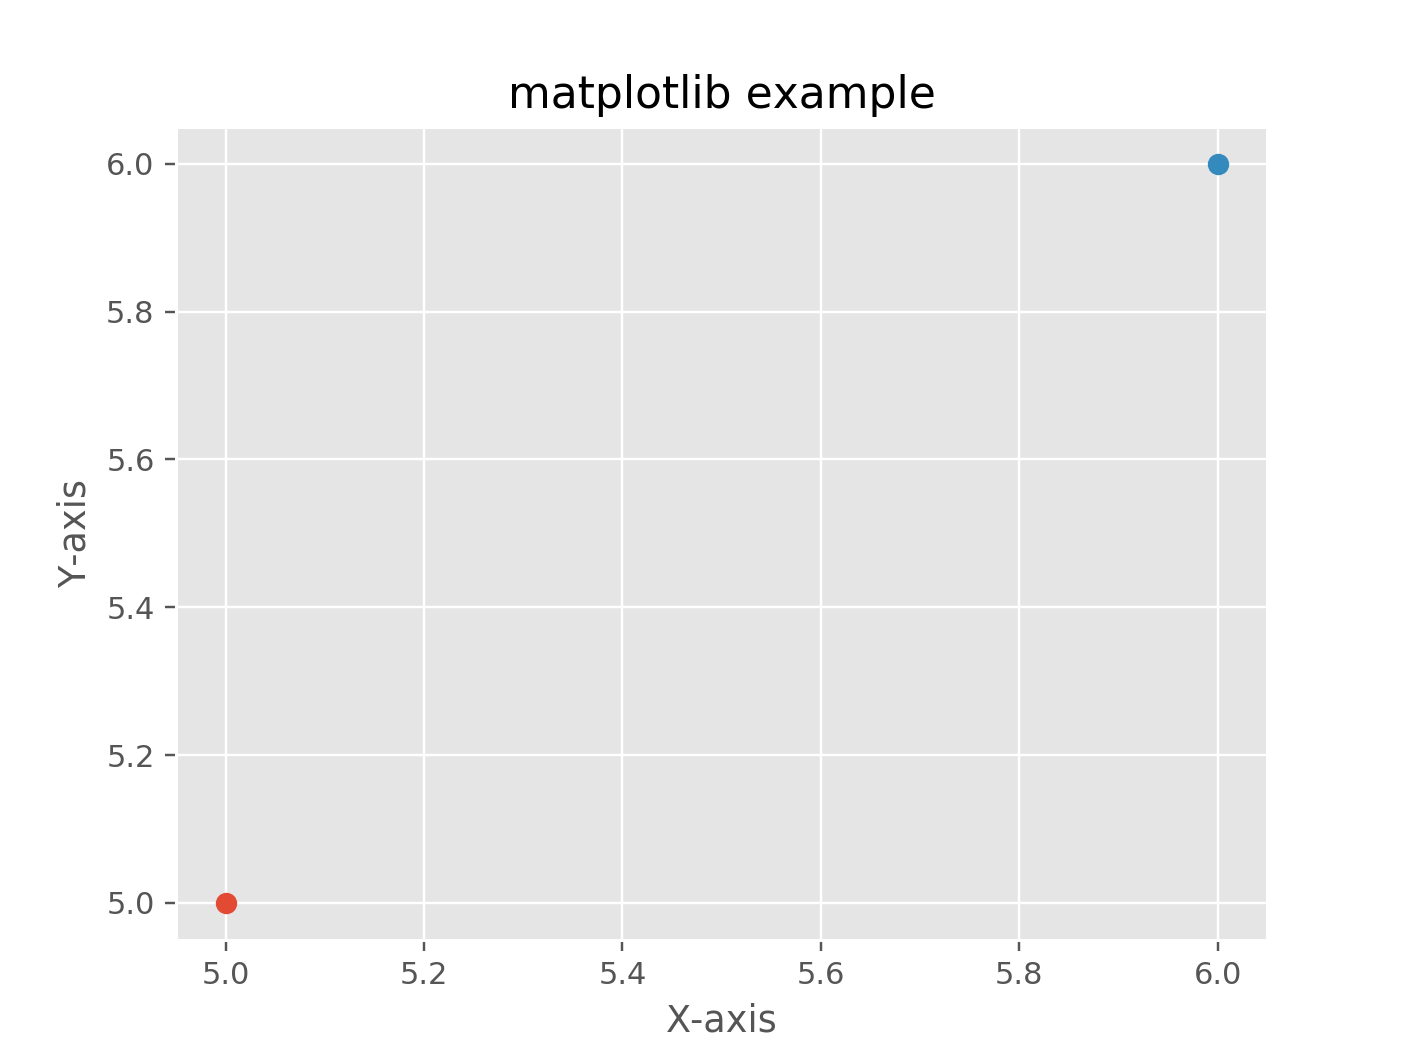

In [24]:
# Creating a new plot
plt.plot(5, 5, 'o')

In [25]:
# Adding a new plot would update the existing figure instead of creating one.
plt.plot(6, 6, 'o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('matplotlib example')

Text(0.5,1,'matplotlib example')

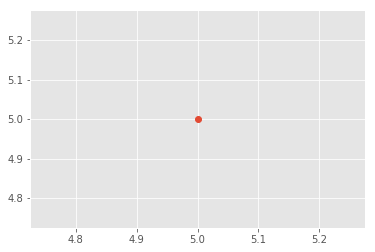

In [26]:
%matplotlib inline
# Constructing a plot using matplotlib's inline magic function
plt.plot(5, 5, 'o')

Text(0.5,1,'matplotlib example')

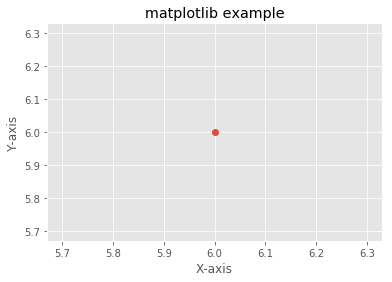

In [6]:
# Adding an another plot in inline mode creates another figure
plt.plot(6, 6, 'o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('matplotlib example')

Text(0.5,1,'matplotlib example')

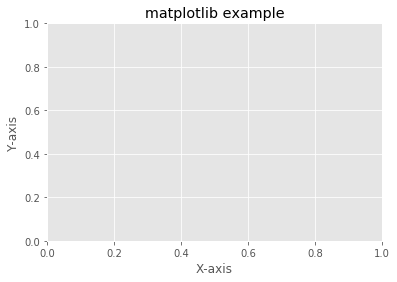

In [7]:
# Adding an another plot in inline mode creates another figure
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('matplotlib example')

In [8]:
# The below line is useless in inline mode when run alone in a separate cell
plt.show()

Dataset Source: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website.

In [87]:
# Loading Canada's immigration data into a pandas dataframe
df_can = pd.read_excel('./Canada.xlsx',
                   sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# Chaning the index column to country names
df_can.set_index('OdName', inplace=True)

In [11]:
# Dropping the irrelavent columns and renaming the columns for better readability
df_can.drop(['AREA', 'REG', 'DEV', 'Type'], axis=1, inplace=True)
df_can.rename(columns={'Coverage': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

In [12]:
# Creating a new column which contains total number of immigrants across all the years of each country
df_can['Total'] = df_can.sum(axis=1)

In [13]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Foreigners,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Foreigners,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Foreigners,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Foreigners,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Foreigners,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [14]:
# Converting the numeric column names to string type to avoid ambiguity with indices
df_can.columns = list(map(str, df_can.columns.tolist()))

Text(0.5,1,'Immigrants from Afghanistan to Canada by year')

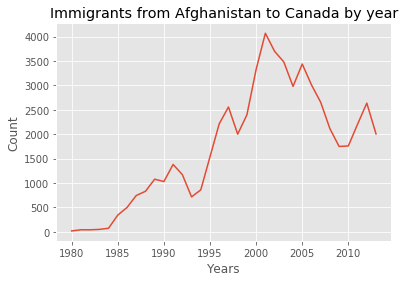

In [15]:
# Plotting a line chart for immigrants from Afghanistan to Canada from 1980 to 2013
years = list(map(str, range(1980, 2014)))
df_afg = df_can.loc['Afghanistan', years].transpose()
df_afg.index = df_afg.index.map(int)
df_afg.plot()
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Immigrants from Afghanistan to Canada by year')

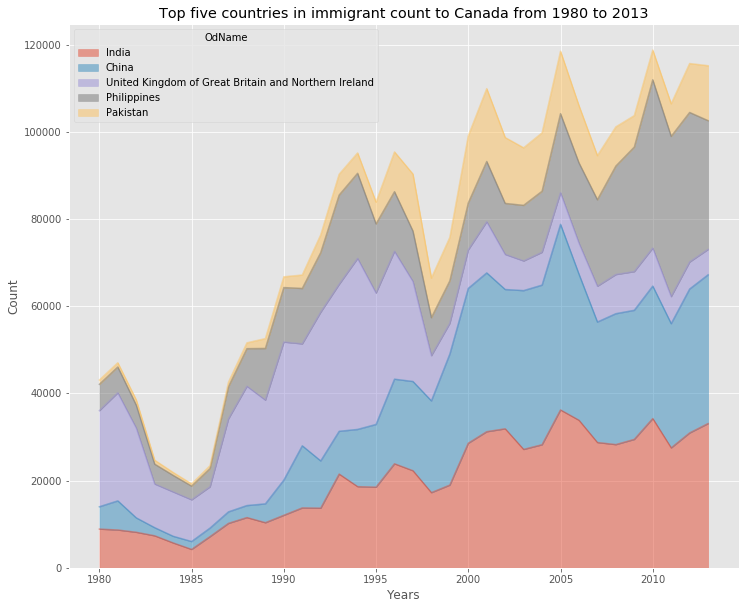

In [16]:
# Plotting an area chart for top five countries in immigrant count to Canada from 1980 to 2013
df_top_five = df_can.sort_values(['Total'], ascending=False).head(5)[years].transpose()
df_top_five.index = df_afg.index.map(int)
df_top_five.plot(kind='area', figsize=(12, 10), alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Top five countries in immigrant count to Canada from 1980 to 2013')
plt.show()

Text(0.5,1,'Histogram of immigration from 195 countries in 2013')

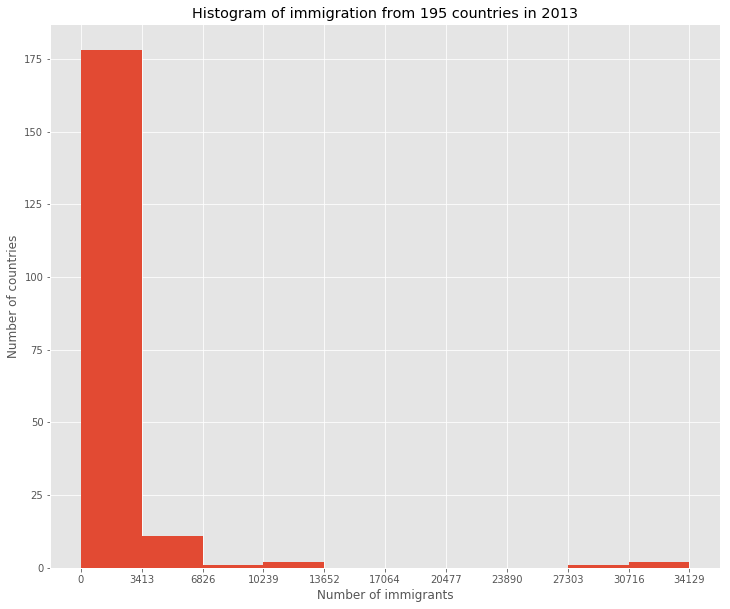

In [17]:
# Histogram of the immigrants of 195 countries in 2013
freq, bins = np.histogram(df_can['2013'])
df_can['2013'].plot(kind='hist', xticks=bins, figsize=(12, 10))
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.title('Histogram of immigration from 195 countries in 2013')

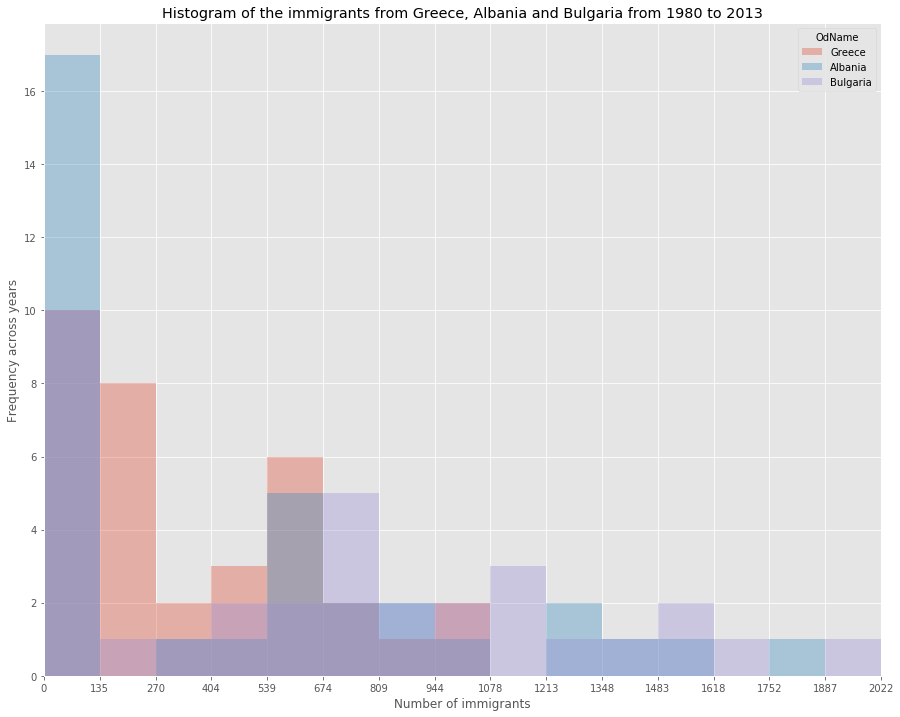

In [18]:
# Histogram of the immigrants from Greece, Albania and Bulgaria from 1980 to 2013
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
count, bin_edges = np.histogram(df_gab, 15)
df_gab.plot(kind='hist',
            figsize=(15, 12),
            bins=15,
            xticks=bin_edges,
            alpha=0.35,
            xlim=(bin_edges[0], bin_edges[-1]) # For limiting x axis co-ordinates
           )
plt.title('Histogram of the immigrants from Greece, Albania and Bulgaria from 1980 to 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Frequency across years')
plt.show()

Text(0.5,1,'Bar chart for Icelandic immigrants to Canada from 1980 to 2013')

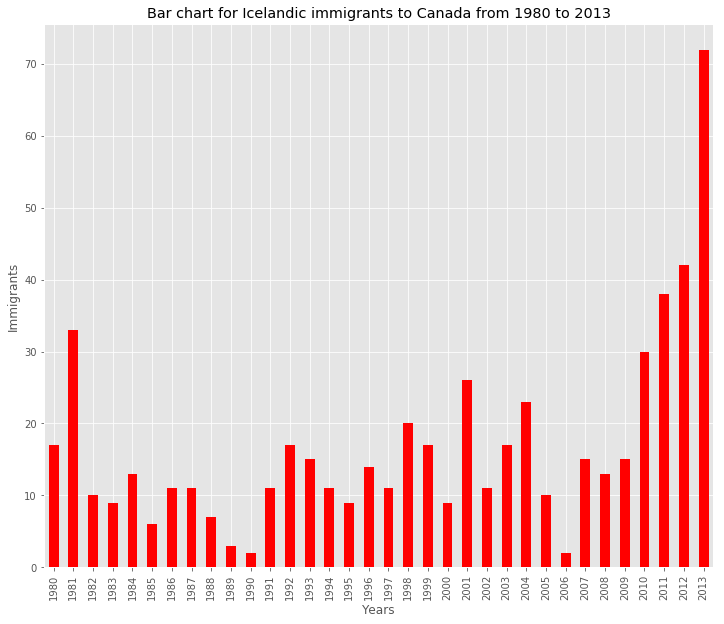

In [19]:
# Bar chart for Icelandic immigrants to Canada from 1980 to 2013
df_iceland = df_can.loc['Iceland', years].transpose()
df_iceland.index = df_iceland.index.map(int)
df_iceland.plot(kind='bar', figsize=(12, 10), color='red')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.title('Bar chart for Icelandic immigrants to Canada from 1980 to 2013')

Horizontal bar plot for the total number of immigrants to Canada from the top 15 countries in 1980-2013

In [20]:
# Step 1: Get the data pertaining to the top 15 countries.
df_top_15 = df_can.sort_values(['Total'])
df_top_15 = df_top_15.tail(15)[years]

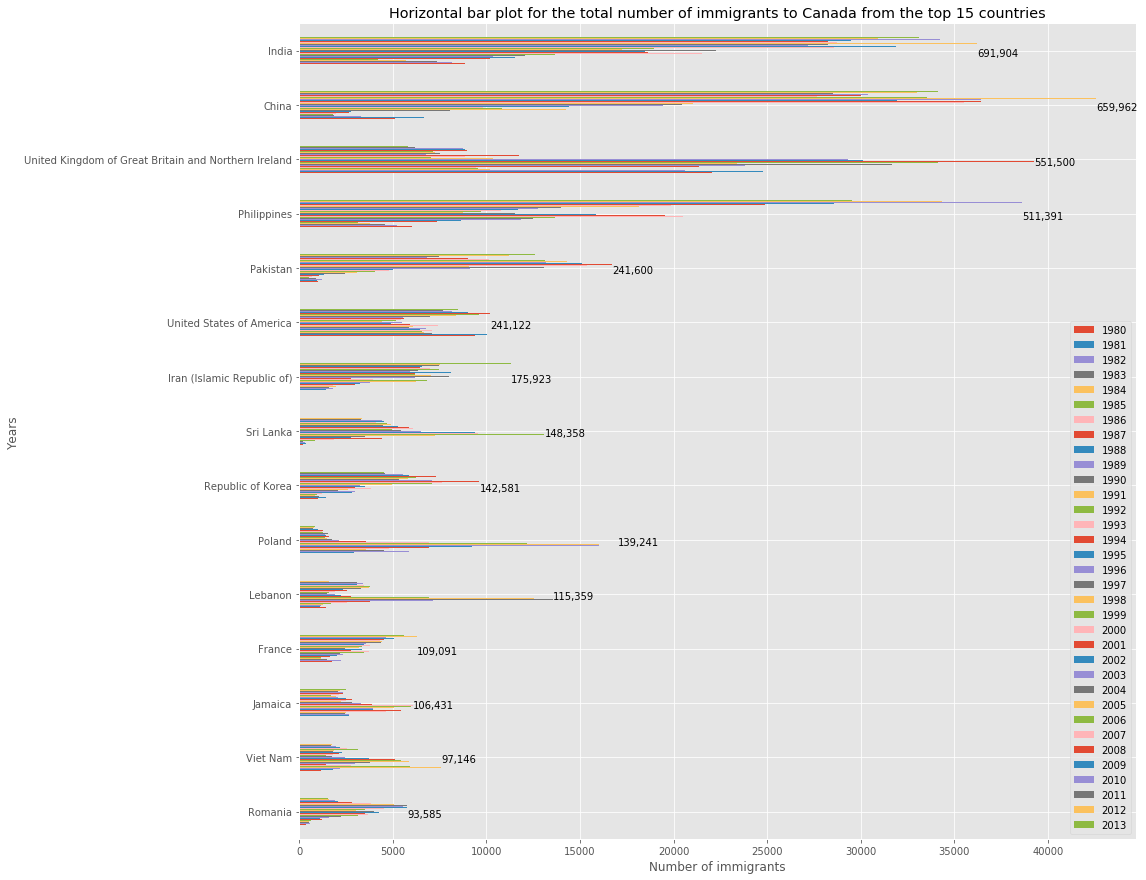

In [21]:
# Step 2: Plot data
df_top_15.plot(kind='barh',
               figsize=(15, 15))
for i, row in enumerate(df_top_15.values):
    label = format(np.sum(row), ',')
    plt.annotate(label,
                 xy=(max(row) + 10, i - 0.1)
                 )
plt.xlabel('Number of immigrants')
plt.ylabel('Years')
plt.title('Horizontal bar plot for the total number of immigrants to Canada from the top 15 countries')
plt.show()

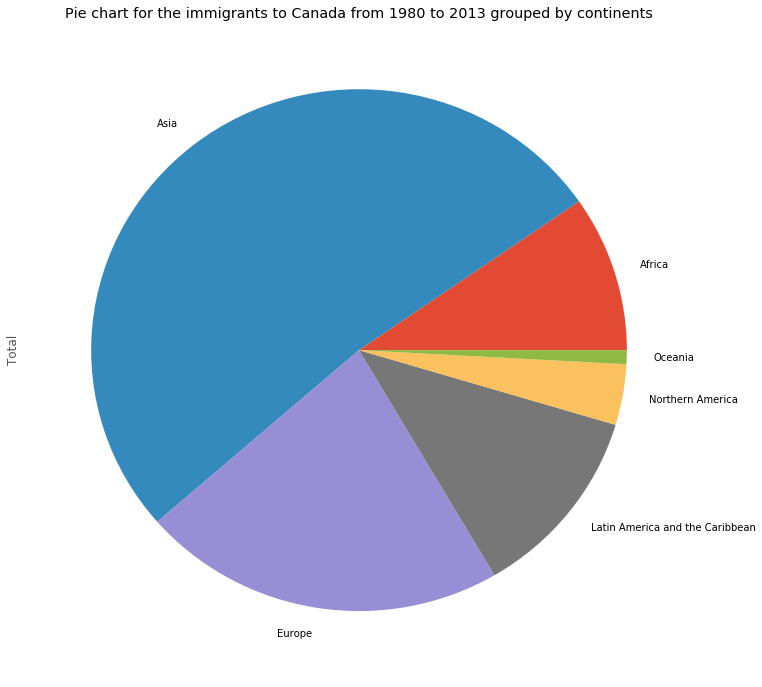

In [31]:
# Pie chart for the immigrants to Canada from 1980 to 2013 grouped by continents
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents['Total'].plot(kind='pie', figsize=(12, 12))
plt.title('Pie chart for the immigrants to Canada from 1980 to 2013 grouped by continents')
plt.show()

Pie chart to show the proportion of new immigrants grouped by continents in the year 2013.


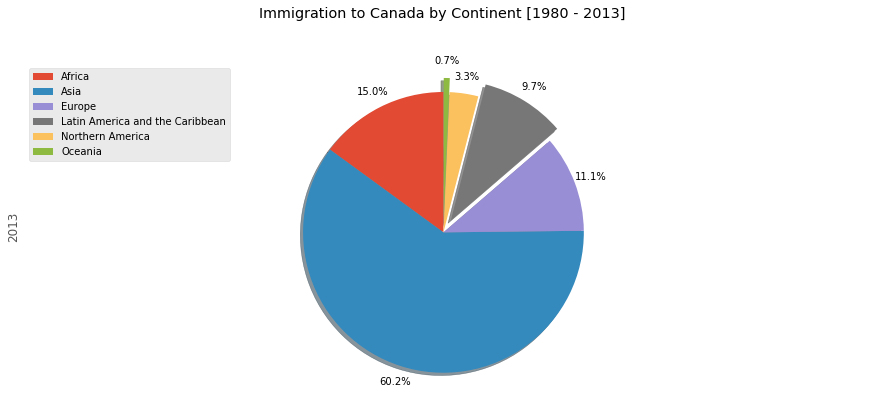

In [82]:
df_2013 = df_can.groupby('Continent').sum()[['2013']]
explode_list = [0, 0, 0, 0.1, 0, 0.1]
df_2013['2013'].plot(kind='pie',
                     autopct='%.1f%%',
                     pctdistance=1.12,
                     figsize=(15, 6),
                     shadow=True,
                     explode=explode_list,
                     labels=None,
                     startangle=90
                    )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')
plt.legend(labels=df_2013.index, loc='upper left')

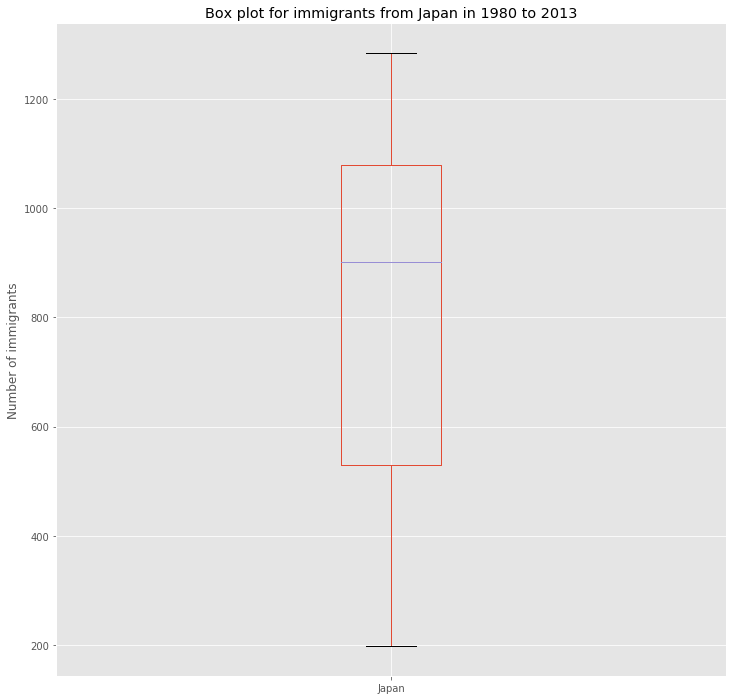

In [34]:
# Box plot for immigrants from Japan in 1980 to 2013
df_japan = df_can.loc['Japan', years].transpose()
df_japan.plot(kind='box', figsize=(12, 12))
plt.ylabel('Number of immigrants')
plt.title('Box plot for immigrants from Japan in 1980 to 2013')
plt.show()

Box plots of the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

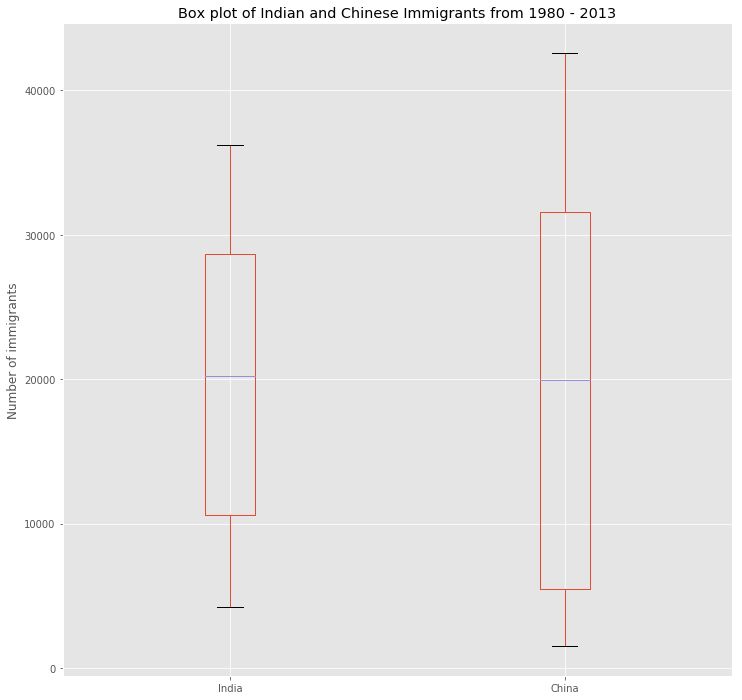

In [83]:
# Step 1: Get the dataset for China and India.
df_IC = df_can.loc[['India', 'China'], years].transpose()

# Step 2: Plot data.
df_IC.plot(kind='box', figsize=(12, 12))
plt.title('Box plot of Indian and Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.show()

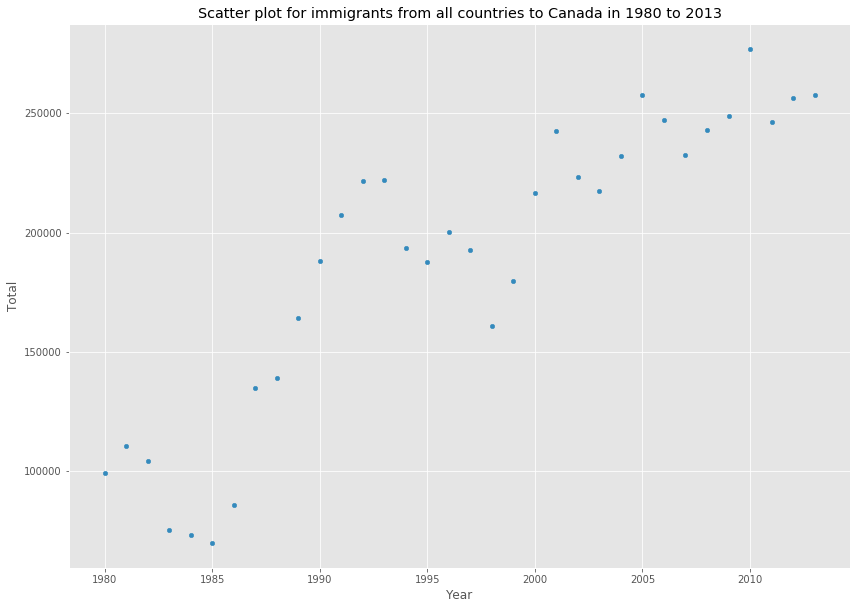

In [78]:
# Scatter plot for immigrants from all countries to Canada in 1980 to 2013

df_total = pd.DataFrame({'Total': df_can[years].sum(), 'Year': list(map(int, years))})
df_total.plot(kind='scatter', x='Year', y='Total', figsize=(14, 10))
plt.title('Scatter plot for immigrants from all countries to Canada in 1980 to 2013')
plt.show()

Bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

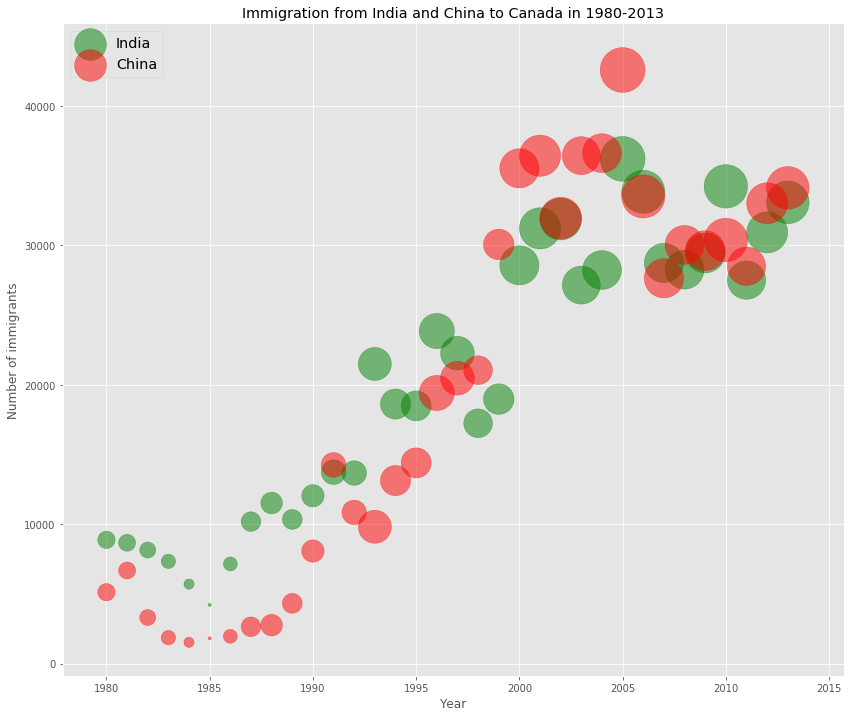

In [84]:
# Step 1: Normalize the data pertaining to China and India.
df_can_t = df_can[years].transpose()
df_can_t.index = df_can_t.index.map(int)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# Step 2: Generate the bubble plots.
ax0 = df_can_t.plot(kind='scatter',
                   figsize=(14, 12),
                   s=norm_india * 2000 + 10,
                   alpha='0.5',
                   color='green',
                   x='Year', 
                   y='India'
                  )

ax1 = df_can_t.plot(kind='scatter',
                   figsize=(14, 12),
                   s=norm_india * 2000 + 10,
                   alpha='0.5',
                   color='red',
                   x='Year', 
                   y='China',
                   ax=ax0
                  )

plt.title('Immigration from India and China to Canada in 1980-2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')